# Time Series Practical Implementation

Steps we follow:
1. Data Ingedtion
2. EDA of the Data
3. Preprocessing of the Data
4. Model Building
5. Model Evaluation

# 1.Data Ingestion

 Import the Required Libraries: Import the required libraries such as pandas, numpy, matplotlib, seaborn, etc.

 Load the Data.

 Load the Time Series Data into a pandas dataframe.

 Set the datetime column as the index of the dataframe.

 Check the datatype of the index and convert it to datetime if necessary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
data=pd.read_csv("TSLA.csv")    # TSLA stok data
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [3]:
# Univariate analysis
stock_data=data[["Date","Close"]]
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [5]:
# Change date time Object type
stock_data["Date"]=pd.to_datetime(stock_data.Date)
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


/tmp/ipykernel_77/854907860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["Date"]=pd.to_datetime(stock_data.Date)


In [6]:
# Set datetime column as the Index of dataframe
stock_data=stock_data.set_index("Date")
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


# why we are converting date column as a index column

1. retriving of the data will be easy
2. visulization will be easy
3. whatever library we are using for the time series like statsmodel or scipy these library wants data which having data column as index

# 2.EDA(Exploratory Data Analysis)

## 1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

## 2. Visualize the Time Series Data
- Plot the Time Series data 

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

## 3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

## 4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

## 5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

## 6. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

In [7]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


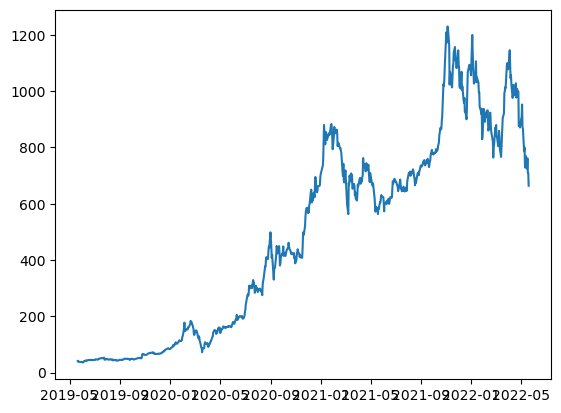

In [8]:
# Plotting the data
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

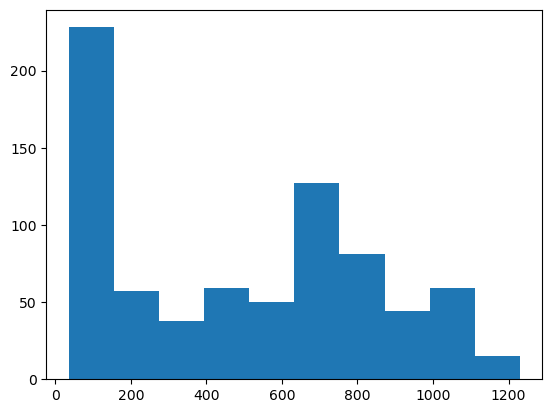

In [9]:
plt.hist(stock_data.Close)

/tmp/ipykernel_109/1231653583.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_data.Close)


<AxesSubplot: xlabel='Close', ylabel='Density'>

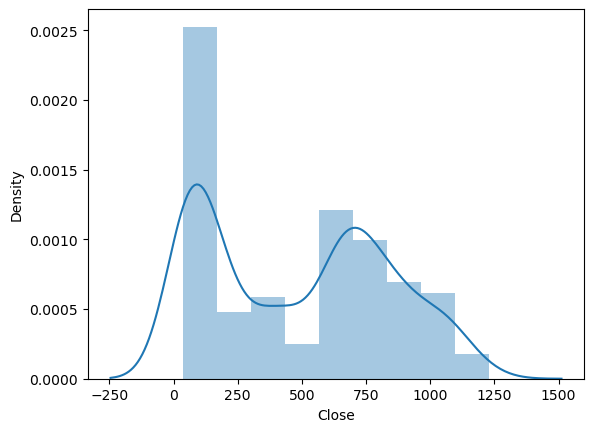

In [10]:
import seaborn as sns
sns.distplot(stock_data.Close)

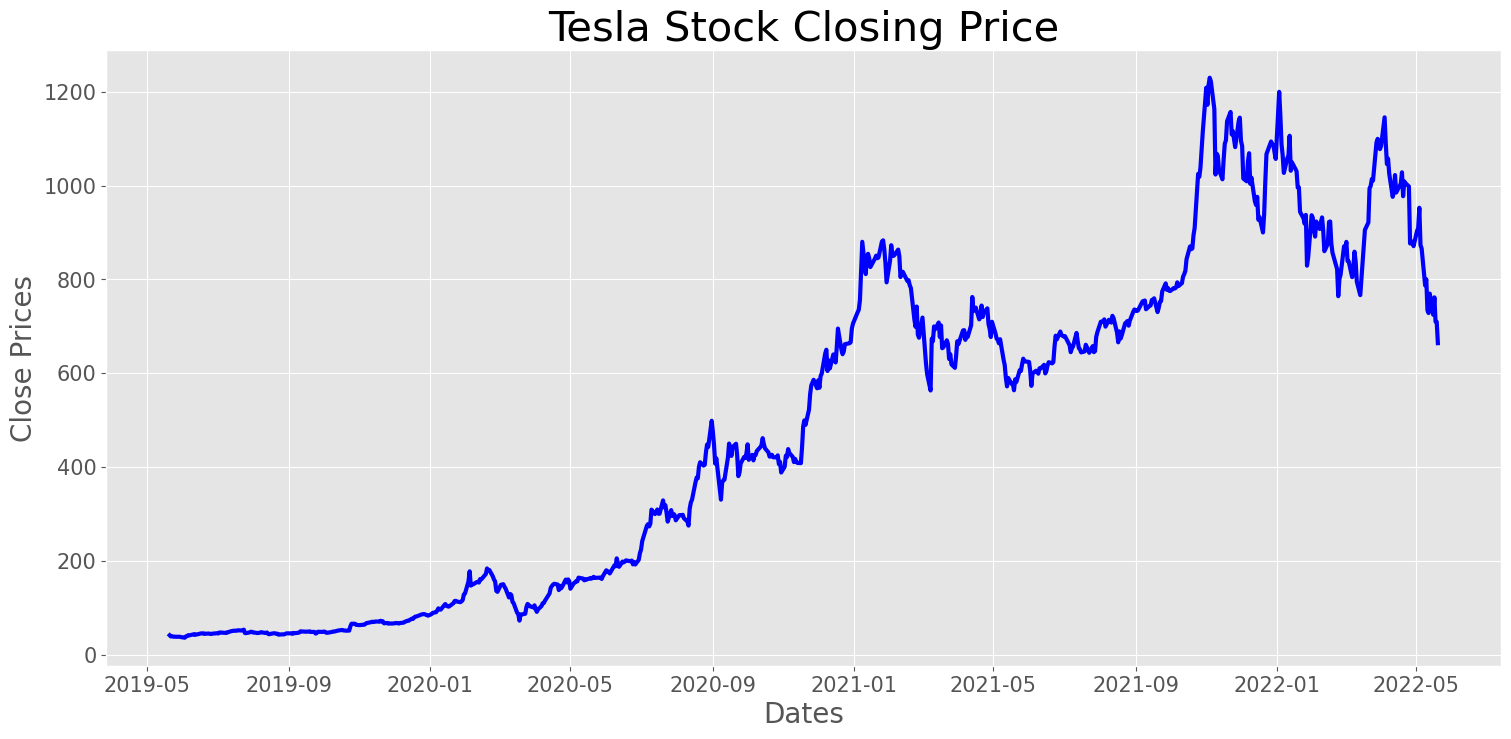

In [9]:
# Plotting Close Price  (Time series)
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices',fontsize=20)
plt.yticks(fontsize=15)
plt.plot(stock_data['Close'], linewidth=3, color='blue')
plt.title('Tesla Stock Closing Price' , fontsize=30)
plt.show()

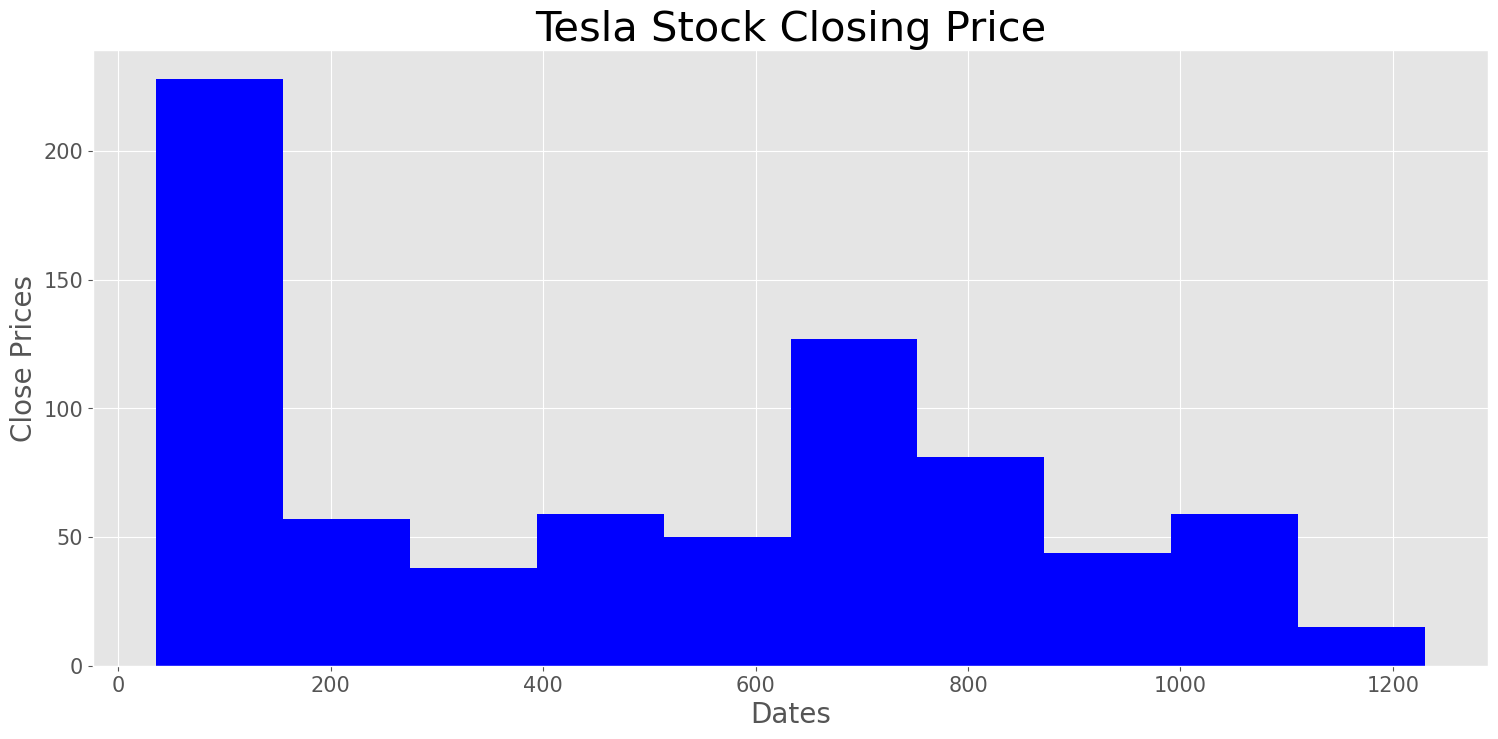

In [12]:
# Plotting Close Price (Histogram)
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices',fontsize=20)
plt.yticks(fontsize=15)
plt.hist(stock_data['Close'], linewidth=3, color='blue')
plt.title('Tesla Stock Closing Price' , fontsize=30)
plt.show()

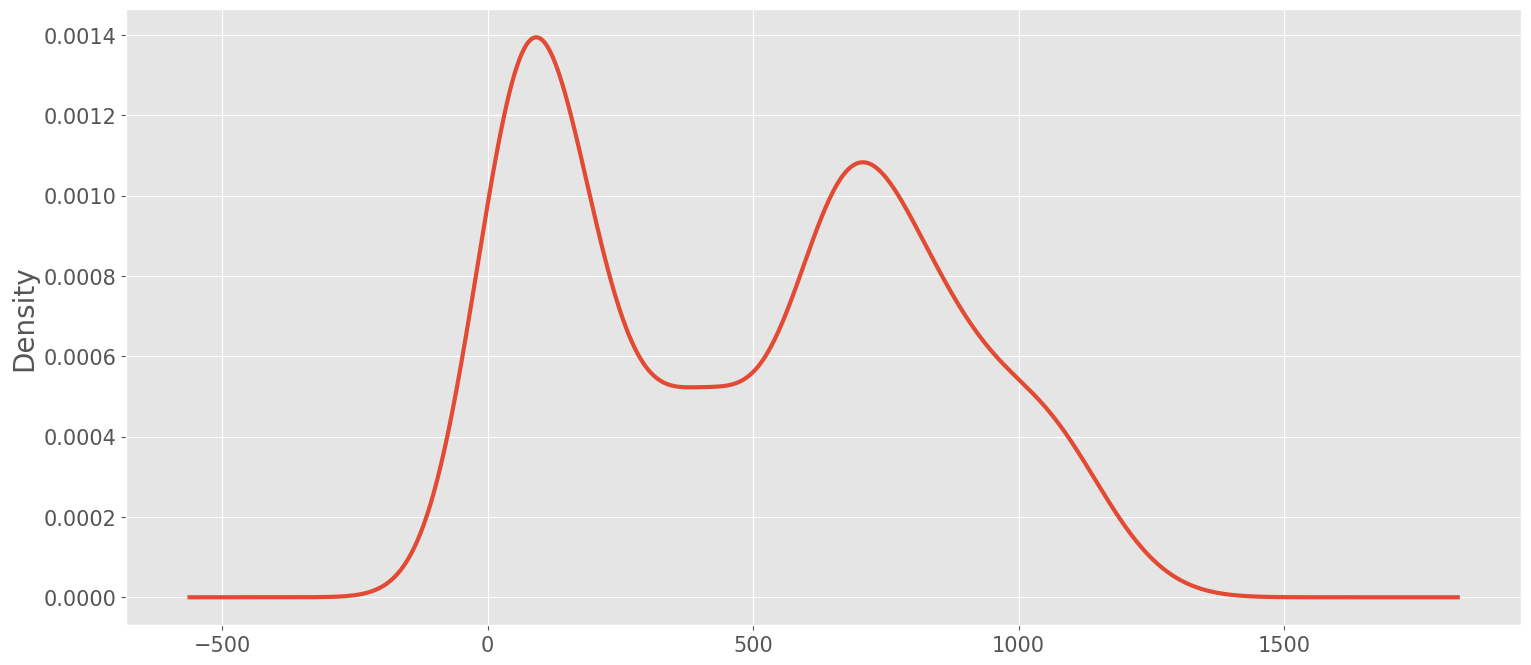

In [10]:
# Distribution of the close price  (Kernal Density estimation)
df_close = stock_data['Close']
df_close.plot(kind='kde', figsize=(18,8), linewidth=3)
plt.xticks(fontsize=15)
plt.grid("both")
plt.ylabel('Density', fontsize =20)
plt.yticks(fontsize = 15)
plt.show()

In [16]:
stock_data["Close"]

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

In [11]:
# Moving average (rolling)
stock_data["Close"].rolling(3).mean()

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23     39.553333
2019-05-24     38.590000
2019-05-28     38.321334
                 ...    
2022-05-16    740.653341
2022-05-17    751.856669
2022-05-18    731.929993
2022-05-19    726.946655
2022-05-20    694.376668
Name: Close, Length: 758, dtype: float64

In [12]:
rolmean=stock_data["Close"].rolling(12).mean()
rolmean

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    826.467504
2022-05-17    817.371668
2022-05-18    801.277501
2022-05-19    784.625000
2022-05-20    760.565002
Name: Close, Length: 758, dtype: float64

In [13]:
rolstd=stock_data["Close"].rolling(12).std()
rolstd

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23          NaN
2019-05-24          NaN
2019-05-28          NaN
                ...    
2022-05-16    78.887958
2022-05-17    79.606002
2022-05-18    80.253903
2022-05-19    76.455365
2022-05-20    63.033361
Name: Close, Length: 758, dtype: float64

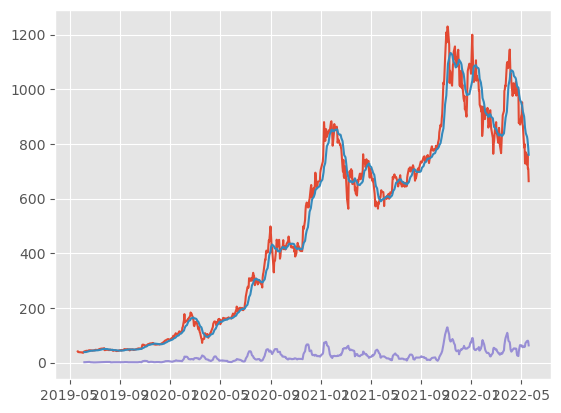

In [14]:
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.plot(rolstd)

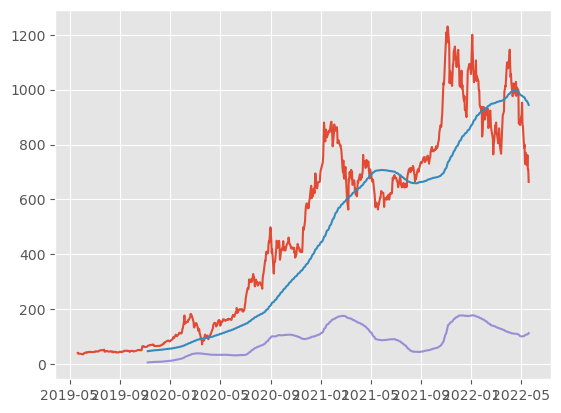

In [15]:
rolmean=stock_data["Close"].rolling(120).mean()
rolstd=stock_data["Close"].rolling(120).std()

plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.plot(rolstd)

In [16]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data.Close)

pd.Series(adft[0:4],index=["test stats","p value","lag","data points"])

# Test stats (t-test, z-test,ANOVA test, pearson test..etc   = area to the culve)

test stats      -1.363009
p value          0.599876
lag              9.000000
data points    748.000000
dtype: float64

In [ ]:
null hypothesis = data is non stationary
p value = 0.599876

p < 0.5
reject null hypothesis

p > 0.5
accept null hypothesis

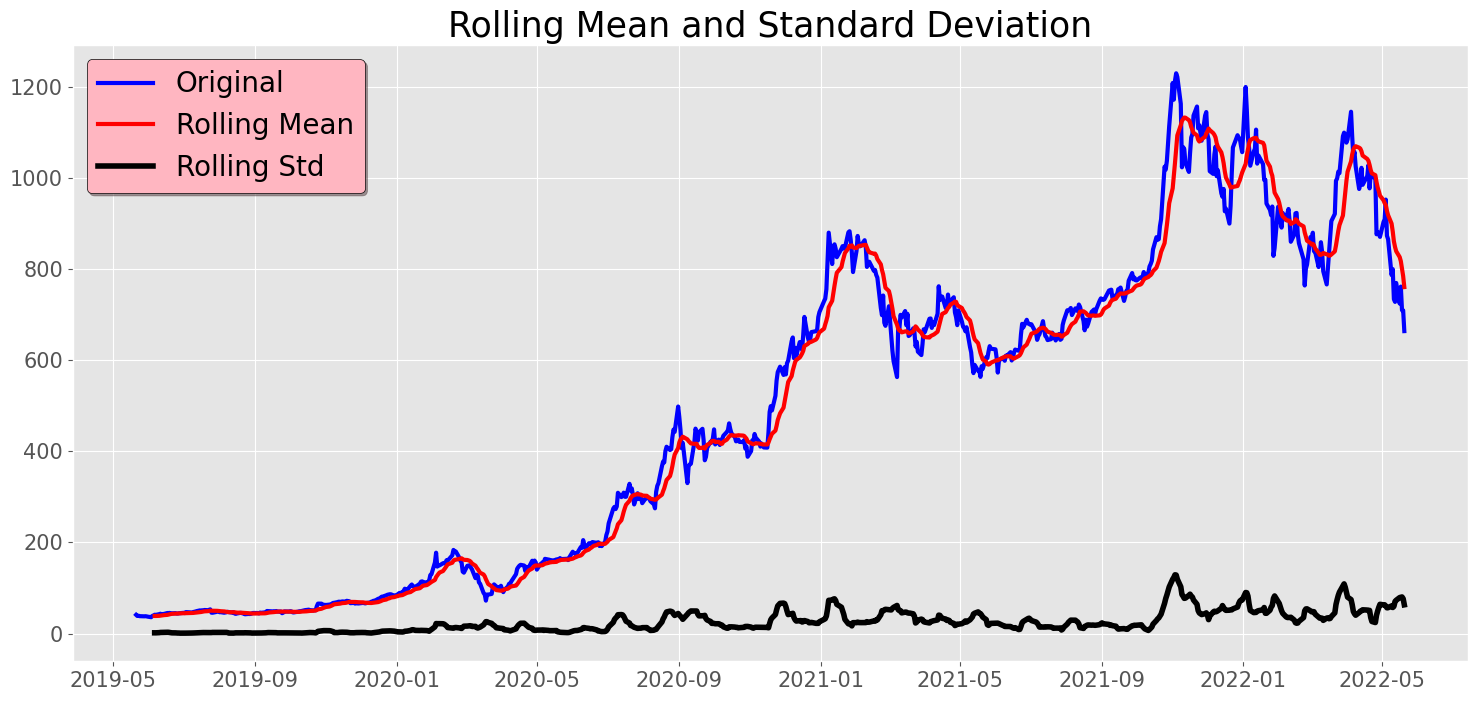

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [17]:
# Test for Stationary

def test_stationarity(timeseries):
    # Determining rolling statistics
    rolmean = timeseries.rolling(12).mean() # rolling mean
    rolstd = timeseries.rolling(12).std()  # rolling standard deviation
    # Plot roling statistics
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue', label='Original', linewidth=3)
    plt.plot(rolmean, color='red', label='Rolling Mean', linewidth=3)
    plt.plot(rolstd, color='black', label='Rolling Std', linewidth=4)
    plt.legend(loc='best', fontsize=20, shadow= True, facecolor='lightpink', edgecolor='k')
    plt.title('Rolling Mean and Standard Deviation', fontsize=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries, autolag = 'AIC')
    # output for dft will give uswithout defining what the values are.
    # hence we manually write what value does it explains using a for loop.
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used', 'Number of observations used'])
    for key, values in adft[4].items():
        output['critical value (%s)' %key] = values
    print(output)
    

test_stationarity(stock_data.Close)

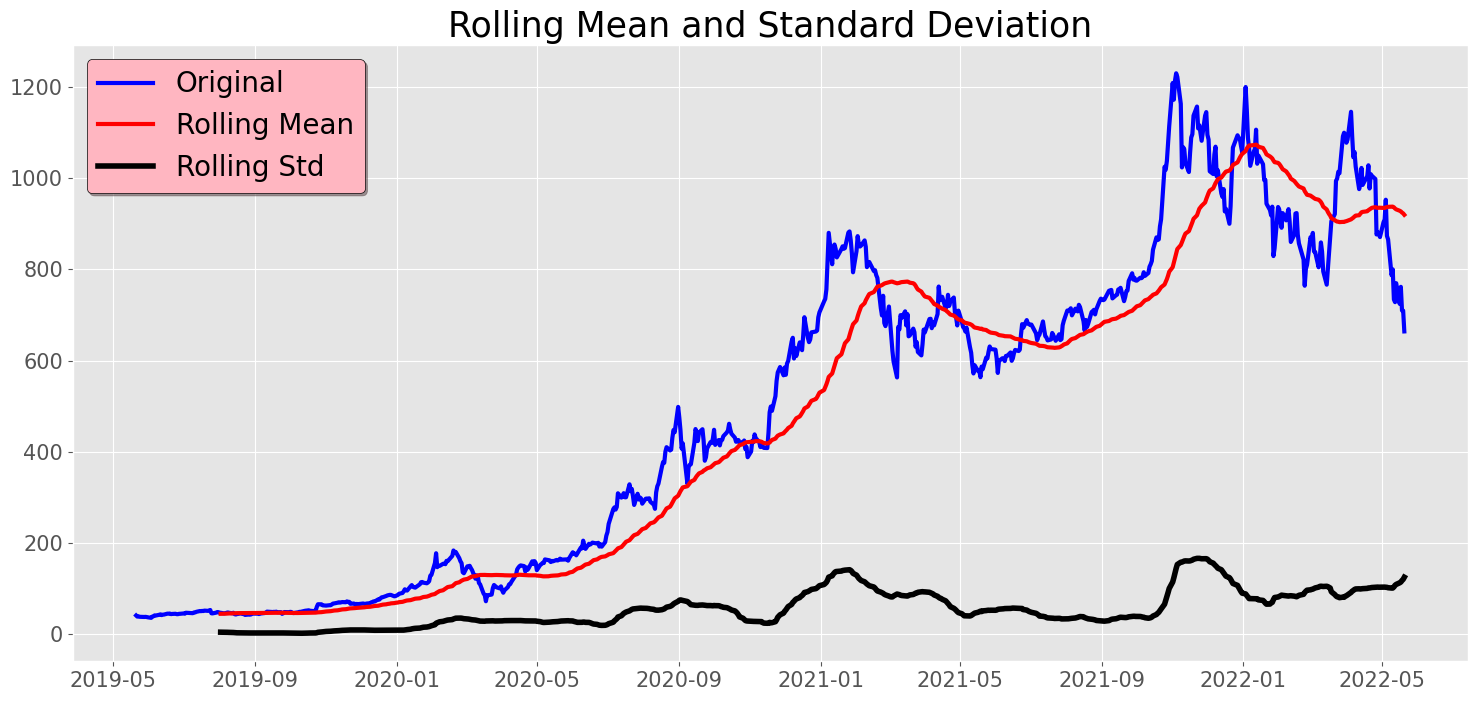

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [29]:
# Test for Stationary

def test_stationarity(timeseries):
    # Determining rolling statistics
    rolmean = timeseries.rolling(52).mean() # rolling mean
    rolstd = timeseries.rolling(52).std()  # rolling standard deviation
    # Plot roling statistics
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue', label='Original', linewidth=3)
    plt.plot(rolmean, color='red', label='Rolling Mean', linewidth=3)
    plt.plot(rolstd, color='black', label='Rolling Std', linewidth=4)
    plt.legend(loc='best', fontsize=20, shadow= True, facecolor='lightpink', edgecolor='k')
    plt.title('Rolling Mean and Standard Deviation', fontsize=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries, autolag = 'AIC')
    # output for dft will give uswithout defining what the values are.
    # hence we manually write what value does it explains using a for loop.
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used', 'Number of observations used'])
    for key, values in adft[4].items():
        output['critical value (%s)' %key] = values
    print(output)
    
test_stationarity(stock_data.Close)    

<AxesSubplot: >

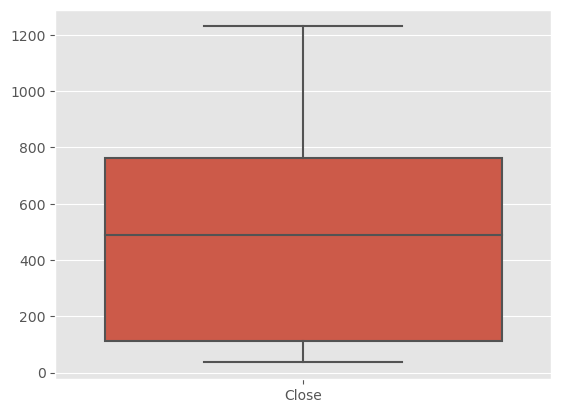

In [30]:
# Check Outliers

sns.boxplot(stock_data)

 No outlier is present

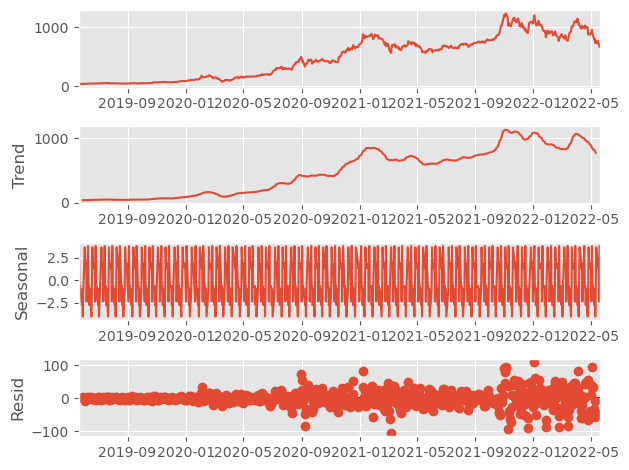

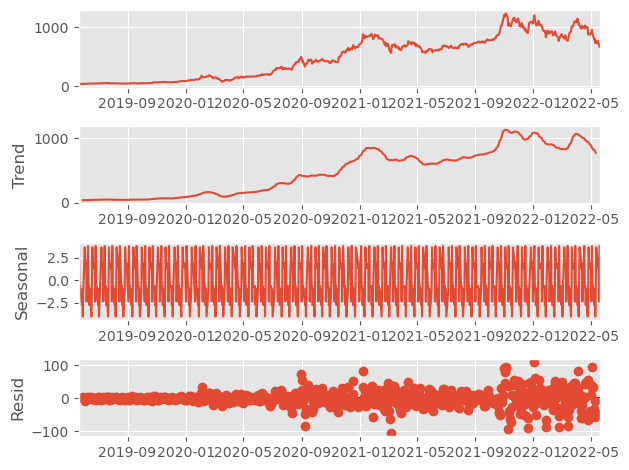

In [31]:
# Time series decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data[["Close"]],period=12)

result.plot()   
# It gives 2-plot, 1st-Additive, 2nd-Multiplicative

In [33]:
# Extract component
result.seasonal
#result.resid
#result.trend

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


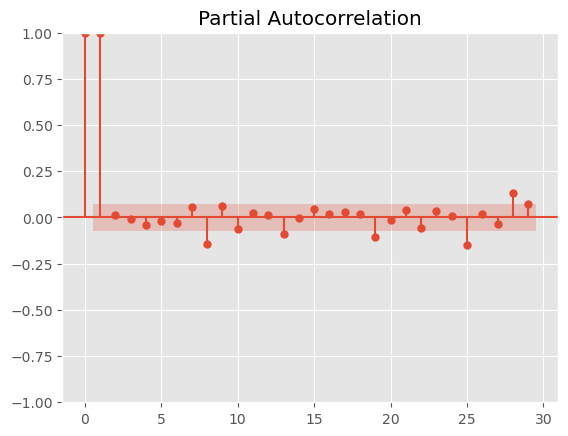

In [ ]:
# Check for Autocorrelation (ACF, PACF)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)


In [1]:
df_close = stock_data['Close']
df_close

NameError: name 'stock_data' is not defined